In [63]:
!pip install -q jupyterplot

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [65]:
def sigmoid(si,sj,a=1):
    delta_s = si-sj
    return _sigmoid(delta_s,a=a)

def _sigmoid(delta_s,a=1):
    return 1/(1+np.exp(-a*(delta_s)))

def loss_func(si,sj,a=1):
    delta_s = si-sj
    return _loss_func(delta_s,a=a)
    
def _loss_func(delta_s,a=1):
    return np.log(1+np.exp(-a*delta_s))

def lambda_ij(si,sj,a=1):
    delta_s = si-sj
    return -abs(delta_s)/(1+np.exp(a*(delta_s)))

def print_scores(si,sj,a=1):
    print(f"steepness: {a}")
    print("Item_i higher than Item_j == True:")
    print(f"Probability: {sigmoid(si,sj,a=a):.2f} | Loss: {loss_func(si,sj,a=a):.3f}")
    print("Item_i higher than Item_j == False:")
    print(f"Probability: {sigmoid(si=sj,sj=si,a=a):.2f} | Loss: {loss_func(si=sj,sj=si,a=a):.3f}")  

In [66]:
a_1 = 0.5
a_2 = 1.0
a_3 = 1.5

In [67]:
print_scores(si=5,sj=2,a=a_1)

steepness: 0.5
Item_i higher than Item_j == True:
Probability: 0.82 | Loss: 0.201
Item_i higher than Item_j == False:
Probability: 0.18 | Loss: 1.701


In [68]:
print_scores(si=5,sj=2,a=a_2)

steepness: 1.0
Item_i higher than Item_j == True:
Probability: 0.95 | Loss: 0.049
Item_i higher than Item_j == False:
Probability: 0.05 | Loss: 3.049


In [69]:
print_scores(si=5,sj=2,a=a_3)

steepness: 1.5
Item_i higher than Item_j == True:
Probability: 0.99 | Loss: 0.011
Item_i higher than Item_j == False:
Probability: 0.01 | Loss: 4.511


In [70]:
x = np.linspace(-10,10,100)

prob_array_1 = _sigmoid(x,a=a_1)
loss_array_1 = _loss_func(x,a=a_1)

prob_array_2 = _sigmoid(x,a=a_2)
loss_array_2 = _loss_func(x,a=a_2)

prob_array_3 = _sigmoid(x,a=a_3)
loss_array_3 = _loss_func(x,a=a_3)

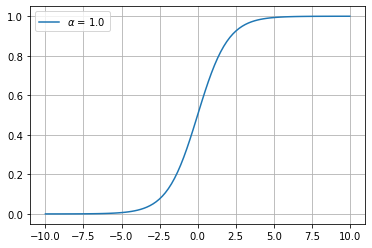

In [71]:
# plt.plot(x,prob_array_1,label=r"$\alpha$ = 0.5")
plt.plot(x,prob_array_2,label=r"$\alpha$ = 1.0")
# plt.plot(x,prob_array_3,label=r"$\alpha$ = 1.5")
plt.legend(loc=0)
plt.grid(True)
plt.show()

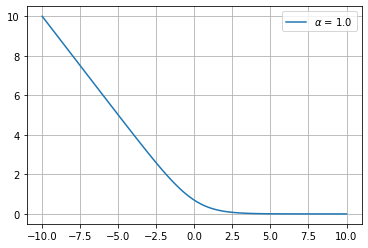

In [72]:
# plt.plot(x,loss_array_1,label=r"$\alpha$ = 0.5")
plt.plot(x,loss_array_2,label=r"$\alpha$ = 1.0")
# plt.plot(x,loss_array_3,label=r"$\alpha$ = 1.5")
plt.legend(loc=0)
plt.grid(True)
plt.show()

## Exemplo

In [73]:
import pandas as pd
from itertools import permutations

In [74]:
scores_sim = pd.DataFrame({
                       "score":[2.3,1.98,1.76,1.2,0.89],
                      },index=["WhiteWalkers","Hightower","Nymeros","Hands","Tully"])

In [75]:
def battle_simulations(runs=1,scores_sim=scores_sim):
    perm = [i for i in permutations(scores_sim.index,2)]
    items_h = []
    items_l = []
    probs_ = []
    loss_ = []
    favorite = []
    for run in range(runs):
        for i,j in perm:
            favorite.append(i)
            prob_ij_ = sigmoid(si=scores_sim.loc[i]["score"],sj=scores_sim.loc[j]["score"])
            loss_ij_ = loss_func(si=scores_sim.loc[i]["score"],sj=scores_sim.loc[j]["score"])
            probs_.append(prob_ij_)
            loss_.append(loss_ij_)
            if prob_ij_ >= np.random.random():
                items_h.append(i)
                items_l.append(j)
            else:
                items_h.append(j)
                items_l.append(i)
    return favorite,items_h,items_l,probs_,loss_

In [76]:
favorite,items_h,items_l,probs_,loss_ =  battle_simulations(runs=5)
df_sim = pd.DataFrame({"favorite":favorite,
                       "item_h":items_h,
                       "item_l":items_l,
                       "probs":probs_,
                       "loss":loss_
                  })

In [77]:
df_sim["item_h"].value_counts() /100

WhiteWalkers    0.27
Hightower       0.20
Nymeros         0.20
Hands           0.20
Tully           0.13
Name: item_h, dtype: float64

In [78]:
def create_scores(df_sim):
    init_scores = (df_sim["item_h"].value_counts() \
                                   .reset_index().sort_values(by="index")["item_h"] /100) \
                .values.astype(float).tolist()

    scores = pd.DataFrame({
                       "score_0":init_scores,
                       "score_1":init_scores,
                       "score_2":init_scores,
                       "score_3":init_scores,
                       "score_4":init_scores,
                       "score_5":init_scores
                      },index=["Hightower","WhiteWalkers","Tully","Nymeros","Hands"])
    return scores.sort_values(by="score_0",ascending=False)

scores = create_scores(df_sim)
scores

,score_0,score_1,score_2,score_3,score_4,score_5
Hands,0.27,0.27,0.27,0.27,0.27,0.27
Hightower,0.20,0.20,0.20,0.20,0.20,0.20
WhiteWalkers,0.20,0.20,0.20,0.20,0.20,0.20
Tully,0.20,0.20,0.20,0.20,0.20,0.20
Nymeros,0.13,0.13,0.13,0.13,0.13,0.13


## Sem atualização

In [79]:
loss_total = []
learning_rate = 0.1
for i in range(df_sim.shape[0]):
    item_h, item_l = df_sim.iloc[i][["item_h","item_l"]]
    prob_ij = sigmoid(si=scores.loc[item_h]["score_0"],sj=scores.loc[item_l]["score_0"])
    loss_ij = loss_func(si=scores.loc[item_h]["score_0"],sj=scores.loc[item_l]["score_0"])
    scores.loc[item_h]["score_1"] = scores.loc[item_h]["score_0"] + learning_rate*loss_ij
    scores.loc[item_l]["score_1"] = scores.loc[item_l]["score_0"] - learning_rate*loss_ij
    loss_total.append(loss_ij)
#     print(item_h,item_l)
#     print(f"Probability: {prob_ij:.2f} | Loss: {loss_ij:.3f}")
print(f"Total loss: {np.sum(loss_total)}")

Total loss: 69.3759405730917


In [80]:
scores.sort_values(by="score_1",ascending=False)

,score_0,score_1,score_2,score_3,score_4,score_5
Hands,0.27,0.335876,0.27,0.27,0.27,0.27
Nymeros,0.13,0.202876,0.13,0.13,0.13,0.13
Tully,0.20,0.134124,0.20,0.20,0.20,0.20
Hightower,0.20,0.130685,0.20,0.20,0.20,0.20
WhiteWalkers,0.20,0.130685,0.20,0.20,0.20,0.20


## Sem atualização - LambdaRank

In [81]:
loss_total = []
learning_rate = 0.1
for i in range(df_sim.shape[0]):
    item_h, item_l = df_sim.iloc[i][["item_h","item_l"]]
    prob_ij = sigmoid(si=scores.loc[item_h]["score_0"],sj=scores.loc[item_l]["score_0"])
    loss_ij = loss_func(si=scores.loc[item_h]["score_0"],sj=scores.loc[item_l]["score_0"])
    lamb_ij = lambda_ij(si=scores.loc[item_h]["score_0"],sj=scores.loc[item_l]["score_0"])
    scores.loc[item_h]["score_2"] = scores.loc[item_h]["score_0"] - learning_rate*lamb_ij*loss_ij
    scores.loc[item_l]["score_2"] = scores.loc[item_l]["score_0"] + learning_rate*lamb_ij*loss_ij
    loss_total.append(loss_ij)
    
print(f"Total loss: {np.sum(loss_total)}")

Total loss: 69.3759405730917


In [82]:
scores.sort_values(by="score_2",ascending=False)

,score_0,score_1,score_2,score_3,score_4,score_5
Hands,0.27,0.335876,0.272225,0.27,0.27,0.27
Hightower,0.20,0.130685,0.200000,0.20,0.20,0.20
WhiteWalkers,0.20,0.130685,0.200000,0.20,0.20,0.20
Tully,0.20,0.134124,0.197775,0.20,0.20,0.20
Nymeros,0.13,0.202876,0.132640,0.13,0.13,0.13


## Com atualização

In [83]:
loss_total = []
learning_rate = 0.1
for i in range(df_sim.shape[0]):
    item_h, item_l = df_sim.iloc[i][["item_h","item_l"]]
    prob_ij = sigmoid(si=scores.loc[item_h]["score_3"],sj=scores.loc[item_l]["score_3"])
    loss_ij = loss_func(si=scores.loc[item_h]["score_3"],sj=scores.loc[item_l]["score_3"])
    lamb_ij = lambda_ij(si=scores.loc[item_h]["score_3"],sj=scores.loc[item_l]["score_3"])
    scores.loc[item_h]["score_3"] = scores.loc[item_h]["score_3"] + learning_rate*loss_ij
    scores.loc[item_l]["score_3"] = scores.loc[item_l]["score_3"] - learning_rate*loss_ij
    loss_total.append(loss_ij)
print(f"Total loss: {np.sum(loss_total)}")

Total loss: 67.43386438588978


In [84]:
scores.sort_values(by="score_3",ascending=False)

,score_0,score_1,score_2,score_3,score_4,score_5
WhiteWalkers,0.20,0.130685,0.200000,0.512936,0.20,0.20
Hands,0.27,0.335876,0.272225,0.432268,0.27,0.27
Nymeros,0.13,0.202876,0.132640,0.154519,0.13,0.13
Tully,0.20,0.134124,0.197775,0.060727,0.20,0.20
Hightower,0.20,0.130685,0.200000,-0.160451,0.20,0.20


## Com atualização - LambdaRank

In [85]:
loss_total = []
learning_rate = 0.1
for i in range(df_sim.shape[0]):
    item_h, item_l = df_sim.iloc[i][["item_h","item_l"]]
    prob_ij = sigmoid(si=scores.loc[item_h]["score_4"],sj=scores.loc[item_l]["score_4"])
    loss_ij = loss_func(si=scores.loc[item_h]["score_4"],sj=scores.loc[item_l]["score_4"])
    lamb_ij = lambda_ij(si=scores.loc[item_h]["score_4"],sj=scores.loc[item_l]["score_4"])
    scores.loc[item_h]["score_4"] = scores.loc[item_h]["score_4"] - learning_rate*lamb_ij*loss_ij
    scores.loc[item_l]["score_4"] = scores.loc[item_l]["score_4"] + learning_rate*lamb_ij*loss_ij
    loss_total.append(loss_ij)
print(f"Total loss: {np.sum(loss_total)}")

Total loss: 69.26196403123555


In [86]:
scores.sort_values(by="score_4",ascending=False)

,score_0,score_1,score_2,score_3,score_4,score_5
Hands,0.27,0.335876,0.272225,0.432268,0.264190,0.27
WhiteWalkers,0.20,0.130685,0.200000,0.512936,0.219268,0.20
Hightower,0.20,0.130685,0.200000,-0.160451,0.200763,0.20
Tully,0.20,0.134124,0.197775,0.060727,0.177468,0.20
Nymeros,0.13,0.202876,0.132640,0.154519,0.138313,0.13


## Full LambdaRank

In [87]:
from jupyterplot import ProgressPlot

In [88]:
def lambdarank(runs=5,df_sim=df_sim,scores=scores,learning_rate=0.1,lr_decay=0):
    pp1 = ProgressPlot(line_names=["WhiteWalkers","Hightower","Nymeros","Hands","Tully"])
    for run in range(runs):
        loss_total = []
        learning_rate = learning_rate*(1-lr_decay)
        for i in range(df_sim.shape[0]):
#             item_h, item_l = df_sim.sample(2).iloc[0][["item_h","item_l"]]
            item_h, item_l = df_sim.iloc[i][["item_h","item_l"]]
            prob_ij = sigmoid(si=scores.loc[item_h]["score_5"],sj=scores.loc[item_l]["score_5"])
            loss_ij = loss_func(si=scores.loc[item_h]["score_5"],sj=scores.loc[item_l]["score_5"])
            lamb_ij = lambda_ij(si=scores.loc[item_h]["score_5"],sj=scores.loc[item_l]["score_5"])
            scores.loc[item_h]["score_5"] = scores.loc[item_h]["score_5"] - learning_rate*lamb_ij*loss_ij
            scores.loc[item_l]["score_5"] = scores.loc[item_l]["score_5"] + learning_rate*lamb_ij*loss_ij
            loss_total.append(loss_ij)
            pp1.update([[scores.loc["WhiteWalkers"]["score_5"],
                        scores.loc["Hightower"]["score_5"],
                        scores.loc["Nymeros"]["score_5"],
                        scores.loc["Hands"]["score_5"],
                        scores.loc["Tully"]["score_5"]]])
        print(f"Total loss: {np.sum(loss_total)}")
    pp1.finalize()
    return scores["score_5"].values

In [89]:
scores["score_5"] = scores["score_0"]
scores["score_5"] = lambdarank(runs=20,df_sim=df_sim,scores=scores,learning_rate=0.1,lr_decay=0.01)

Total loss: 69.26347875404282
Total loss: 68.95840367582977
Total loss: 68.67779280552112
Total loss: 68.39142122593623
Total loss: 68.12510884574517
Total loss: 67.90940181510241
Total loss: 67.75726748709442
Total loss: 67.66127953754713
Total loss: 67.60507889438492
Total loss: 67.57384177259225
Total loss: 67.55692010497137
Total loss: 67.54751749355623
Total loss: 67.54201678913063
Total loss: 67.5384975706335
Total loss: 67.53592667900158
Total loss: 67.53376495210559
Total loss: 67.53174213133919
Total loss: 67.52973123366375
Total loss: 67.52767964038726
Total loss: 67.5255718749365


In [90]:
scores.sort_values(by="score_5",ascending=False)

,score_0,score_1,score_2,score_3,score_4,score_5
WhiteWalkers,0.20,0.130685,0.200000,0.512936,0.219268,0.429458
Hands,0.27,0.335876,0.272225,0.432268,0.264190,0.241991
Hightower,0.20,0.130685,0.200000,-0.160451,0.200763,0.161373
Tully,0.20,0.134124,0.197775,0.060727,0.177468,0.089987
Nymeros,0.13,0.202876,0.132640,0.154519,0.138313,0.077191
